In [1]:
library(MASS)
bh<-MASS::Boston


In [28]:
#####load packages   ######
library('tidyr', warn.conflicts = FALSE)
library('ggplot2', warn.conflicts = FALSE)
library('MASS', warn.conflicts = FALSE)
library('reshape2', warn.conflicts = FALSE)
library('moments', warn.conflicts = FALSE)
library('dplyr', warn.conflicts = FALSE)


In [29]:
summary(bh)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [30]:
install.packages('rpart')
library(caret)
library(rpart)

Warning message in system2(cmd0, args, env = env, stdout = outfile, stderr = outfile):
“system call failed: Cannot allocate memory”Warning message in install.packages("rpart"):
“installation of package ‘rpart’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [31]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

In [32]:
calculate_r_2_for_feature(bh,'tax')

[1] 0.9370609

In [33]:
print(paste("crim: ", calculate_r_2_for_feature(bh,'crim')))
print(paste("zn: ", calculate_r_2_for_feature(bh,'zn')))
print(paste("indus: ", calculate_r_2_for_feature(bh,'indus')))
print(paste("chas: ", calculate_r_2_for_feature(bh,'chas')))
print(paste("nox: ", calculate_r_2_for_feature(bh,'nox')))
print(paste("rm: ", calculate_r_2_for_feature(bh,'rm')))
print(paste("age: ", calculate_r_2_for_feature(bh,'age')))
print(paste("dis: ", calculate_r_2_for_feature(bh,'dis')))
print(paste("rad: ", calculate_r_2_for_feature(bh,'rad')))
print(paste("tax: ", calculate_r_2_for_feature(bh,'tax')))
print(paste("ptratio: ", calculate_r_2_for_feature(bh,'ptratio')))
print(paste("black: ", calculate_r_2_for_feature(bh,'black')))
print(paste("lstat: ", calculate_r_2_for_feature(bh,'lstat')))
print(paste("medv: ", calculate_r_2_for_feature(bh,'medv')))


[1] "crim:  0.422840523203806"
[1] "zn:  0.833605502878536"
[1] "indus:  0.705604949589589"
[1] "chas:  -0.0827344505880574"
[1] "nox:  0.857599099483075"
[1] "rm:  0.415473905459689"
[1] "age:  0.54016613940029"
[1] "dis:  0.810695597758914"
[1] "rad:  0.779732196239491"
[1] "tax:  0.904382184165698"
[1] "ptratio:  0.830921709485882"
[1] "black:  0.237956262151585"
[1] "lstat:  0.757951026405489"
[1] "medv:  0.785215686507393"


But this is subject to randomness. There is randomness in my train_test_split. Let's do the whole thing many times and take the average. 

In [34]:
bh_numeric <- Filter(is.numeric, bh)
mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}
for (itn in 1:length(colnames(bh_numeric))) {
    mean_r2_for_feature(data = bh, feature = colnames(bh_numeric)[itn])
}

for (itn in 1:length(colnames(bh_numeric))) {
    mean_r2_for_feature(data = bh_numeric, feature = colnames(bh_numeric)[itn])
}

In [35]:
print(paste("crim: ", mean_r_2_for_feature(bh,'crim')))
print(paste("zn: ", mean_r_2_for_feature(bh,'zn')))
print(paste("indus: ", mean_r_2_for_feature(bh,'indus')))
print(paste("chas: ", mean_r_2_for_feature(bh,'chas')))
print(paste("nox: ", mean_r_2_for_feature(bh,'nox')))
print(paste("rm: ", mean_r_2_for_feature(bh,'rm')))
print(paste("age: ", mean_r_2_for_feature(bh,'age')))
print(paste("dis: ", mean_r_2_for_feature(bh,'dis')))
print(paste("rad: ", mean_r_2_for_feature(bh,'rad')))
print(paste("tax: ", mean_r_2_for_feature(bh,'tax')))
print(paste("ptratio: ", mean_r_2_for_feature(bh,'ptratio')))
print(paste("black: ", mean_r_2_for_feature(bh,'black')))
print(paste("lstat: ", mean_r_2_for_feature(bh,'lstat')))
print(paste("medv: ", mean_r_2_for_feature(bh,'medv')))


ERROR: Error in mean_r_2_for_feature(bh, "crim"): could not find function "mean_r_2_for_feature"


In [36]:
cor(bh)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


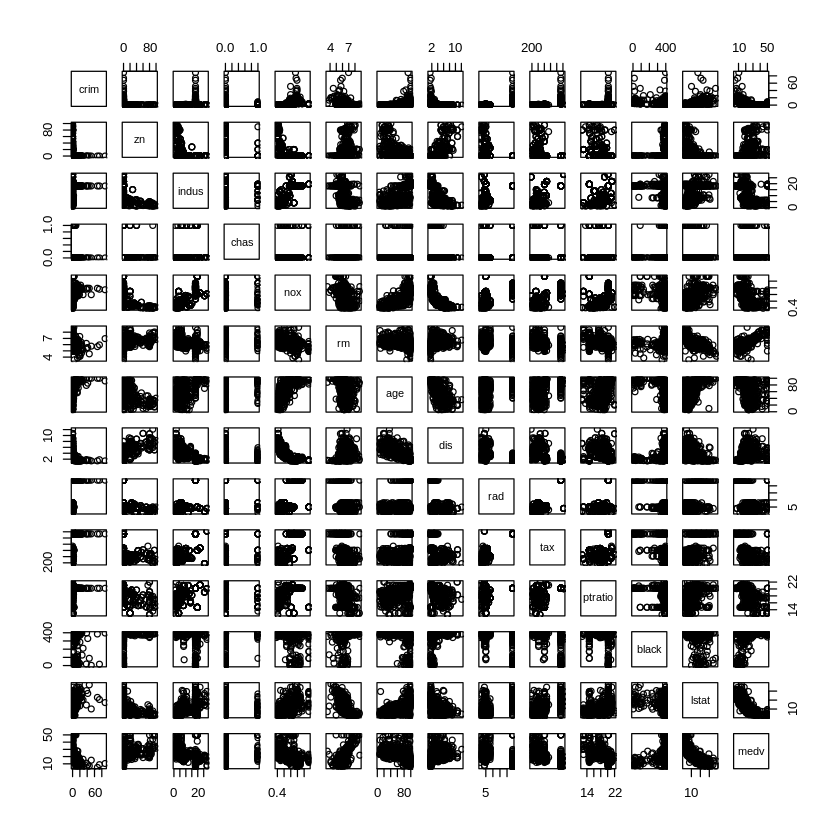

In [37]:
pairs(bh)

In [42]:

cormat = cor(bh)

In [43]:
cormat[lower.tri(cormat)] <- NA

In [44]:
melted_cormat <- melt(cormat, na.rm = T)

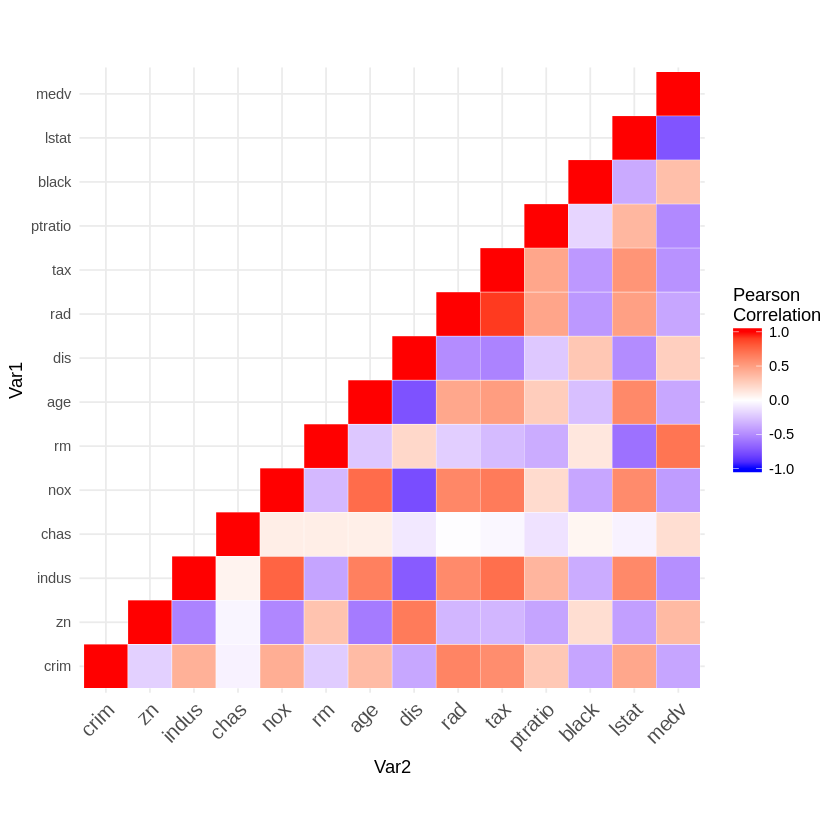

In [45]:
library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()